## Mohler before preprocessing

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_mohler = pd.read_csv("aes_dataset_5k_clean.csv")
df_mohler = df_mohler[df_mohler['dataset'] == 'sag'].reset_index(drop=True)
if 'dataset_num' in df_mohler.columns:
    df_mohler = df_mohler.drop(columns=['dataset_num'])
df_mohler['dataset_num'] = 'sag-'+(df_mohler.groupby('question').ngroup() + 1).astype(str)
print(df_mohler.info())
df_mohler.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2326 non-null   object 
 1   reference_answer  2326 non-null   object 
 2   answer            2326 non-null   object 
 3   score             2326 non-null   float64
 4   normalized_score  2326 non-null   float64
 5   multibert_length  2326 non-null   int64  
 6   dataset           2326 non-null   object 
 7   dataset_num       2326 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 145.5+ KB
None


,question,reference_answer,answer,score,normalized_score,multibert_length,dataset,dataset_num
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5,0.7,76,sag,sag-71
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,1.0,81,sag,sag-71
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,0.8,60,sag,sag-71
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,1.0,84,sag,sag-71
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,0.6,80,sag,sag-71


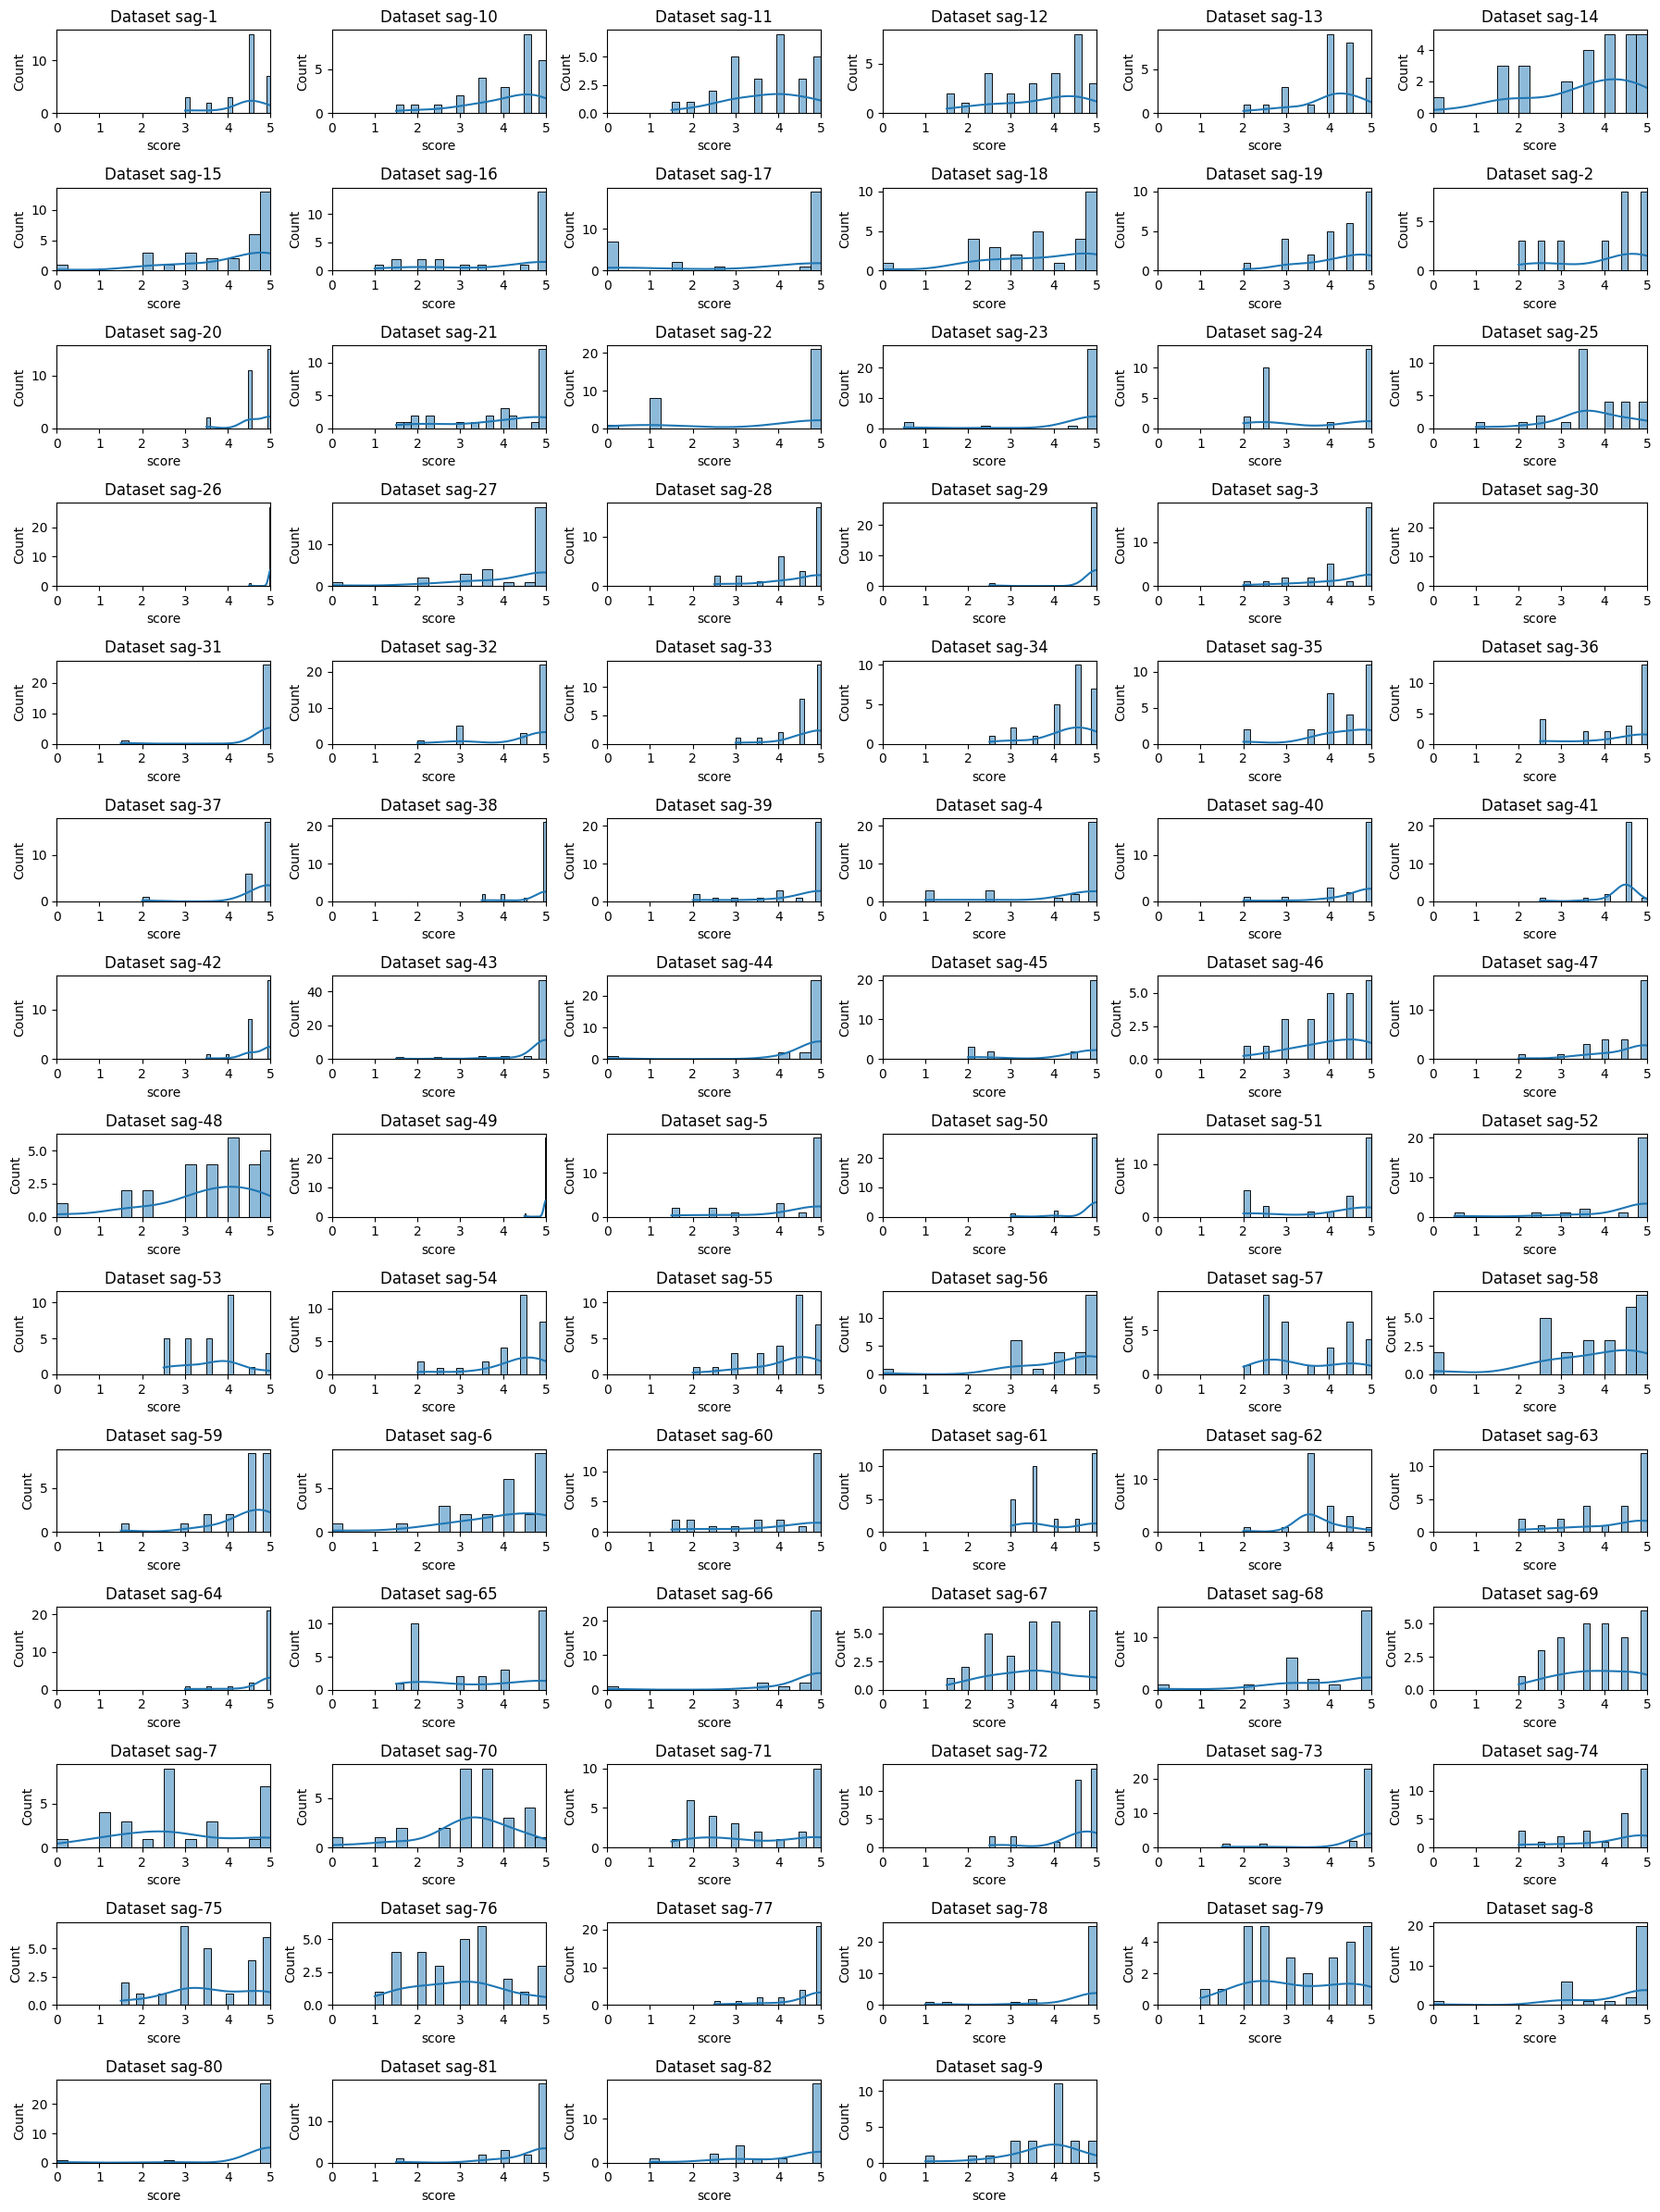

In [52]:
# Mengatur ukuran subplot grid
rows = 14
cols = 6

# Membuat figure
fig, axes = plt.subplots(rows, cols, figsize=(18, 24))
axes = axes.flatten()

# Looping untuk setiap dataset_num
for i, dataset_num in enumerate(sorted(df_mohler['dataset_num'].unique())):
    ax = axes[i]
    subset = df_mohler[df_mohler['dataset_num'] == dataset_num]
    sns.histplot(subset['score'], bins=20, kde=True, ax=ax)
    ax.set_title(f"Dataset {dataset_num}")
    ax.set_xlim(0, 5)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


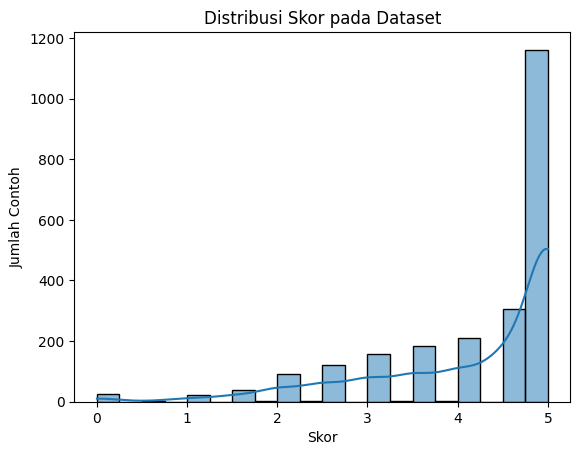

In [53]:
plt.figure()
sns.histplot(df_mohler['score'], bins=20, kde=True)
plt.title('Distribusi Skor pada Dataset')
plt.xlabel('Skor')
plt.ylabel('Jumlah Contoh')
plt.show()

## Mohler after preprocessing

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_mohler = pd.read_csv("mohler_clean.csv")
df_mohler.drop(columns=['dataset_num'], inplace=True)
if 'dataset_num' in df_mohler.columns:
    df_mohler = df_mohler.drop(columns=['dataset_num'])
df_mohler['dataset_num'] = 'sag-'+(df_mohler.groupby('question').ngroup() + 1).astype(str)
# df_mohler.to_csv("mohler_clean.csv", index=False)
print(df_mohler.info())
df_mohler.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2138 non-null   object 
 1   reference_answer  2138 non-null   object 
 2   answer            2138 non-null   object 
 3   score             2138 non-null   float64
 4   dataset           2138 non-null   object 
 5   dataset_num       2138 non-null   object 
dtypes: float64(1), object(5)
memory usage: 100.3+ KB
None


,question,reference_answer,answer,score,dataset,dataset_num
0,What is the role of a prototype program in pro...,to simulate the behaviour of portions of the d...,high risk problems are address in the prototyp...,3.5,sag,sag-71
1,What is the role of a prototype program in pro...,to simulate the behaviour of portions of the d...,prototype programming is an approach to progra...,2.5,sag,sag-71
2,What is the role of a prototype program in pro...,to simulate the behaviour of portions of the d...,to show that a certain part of the program wor...,3.0,sag,sag-71
3,What is the role of a prototype program in pro...,to simulate the behaviour of portions of the d...,the prototype program gives a general idea of ...,3.0,sag,sag-71
4,What is the role of a prototype program in pro...,to simulate the behaviour of portions of the d...,the role of a prototype program is to help spo...,2.0,sag,sag-71


In [31]:
len(df_mohler['dataset_num'].unique())

82

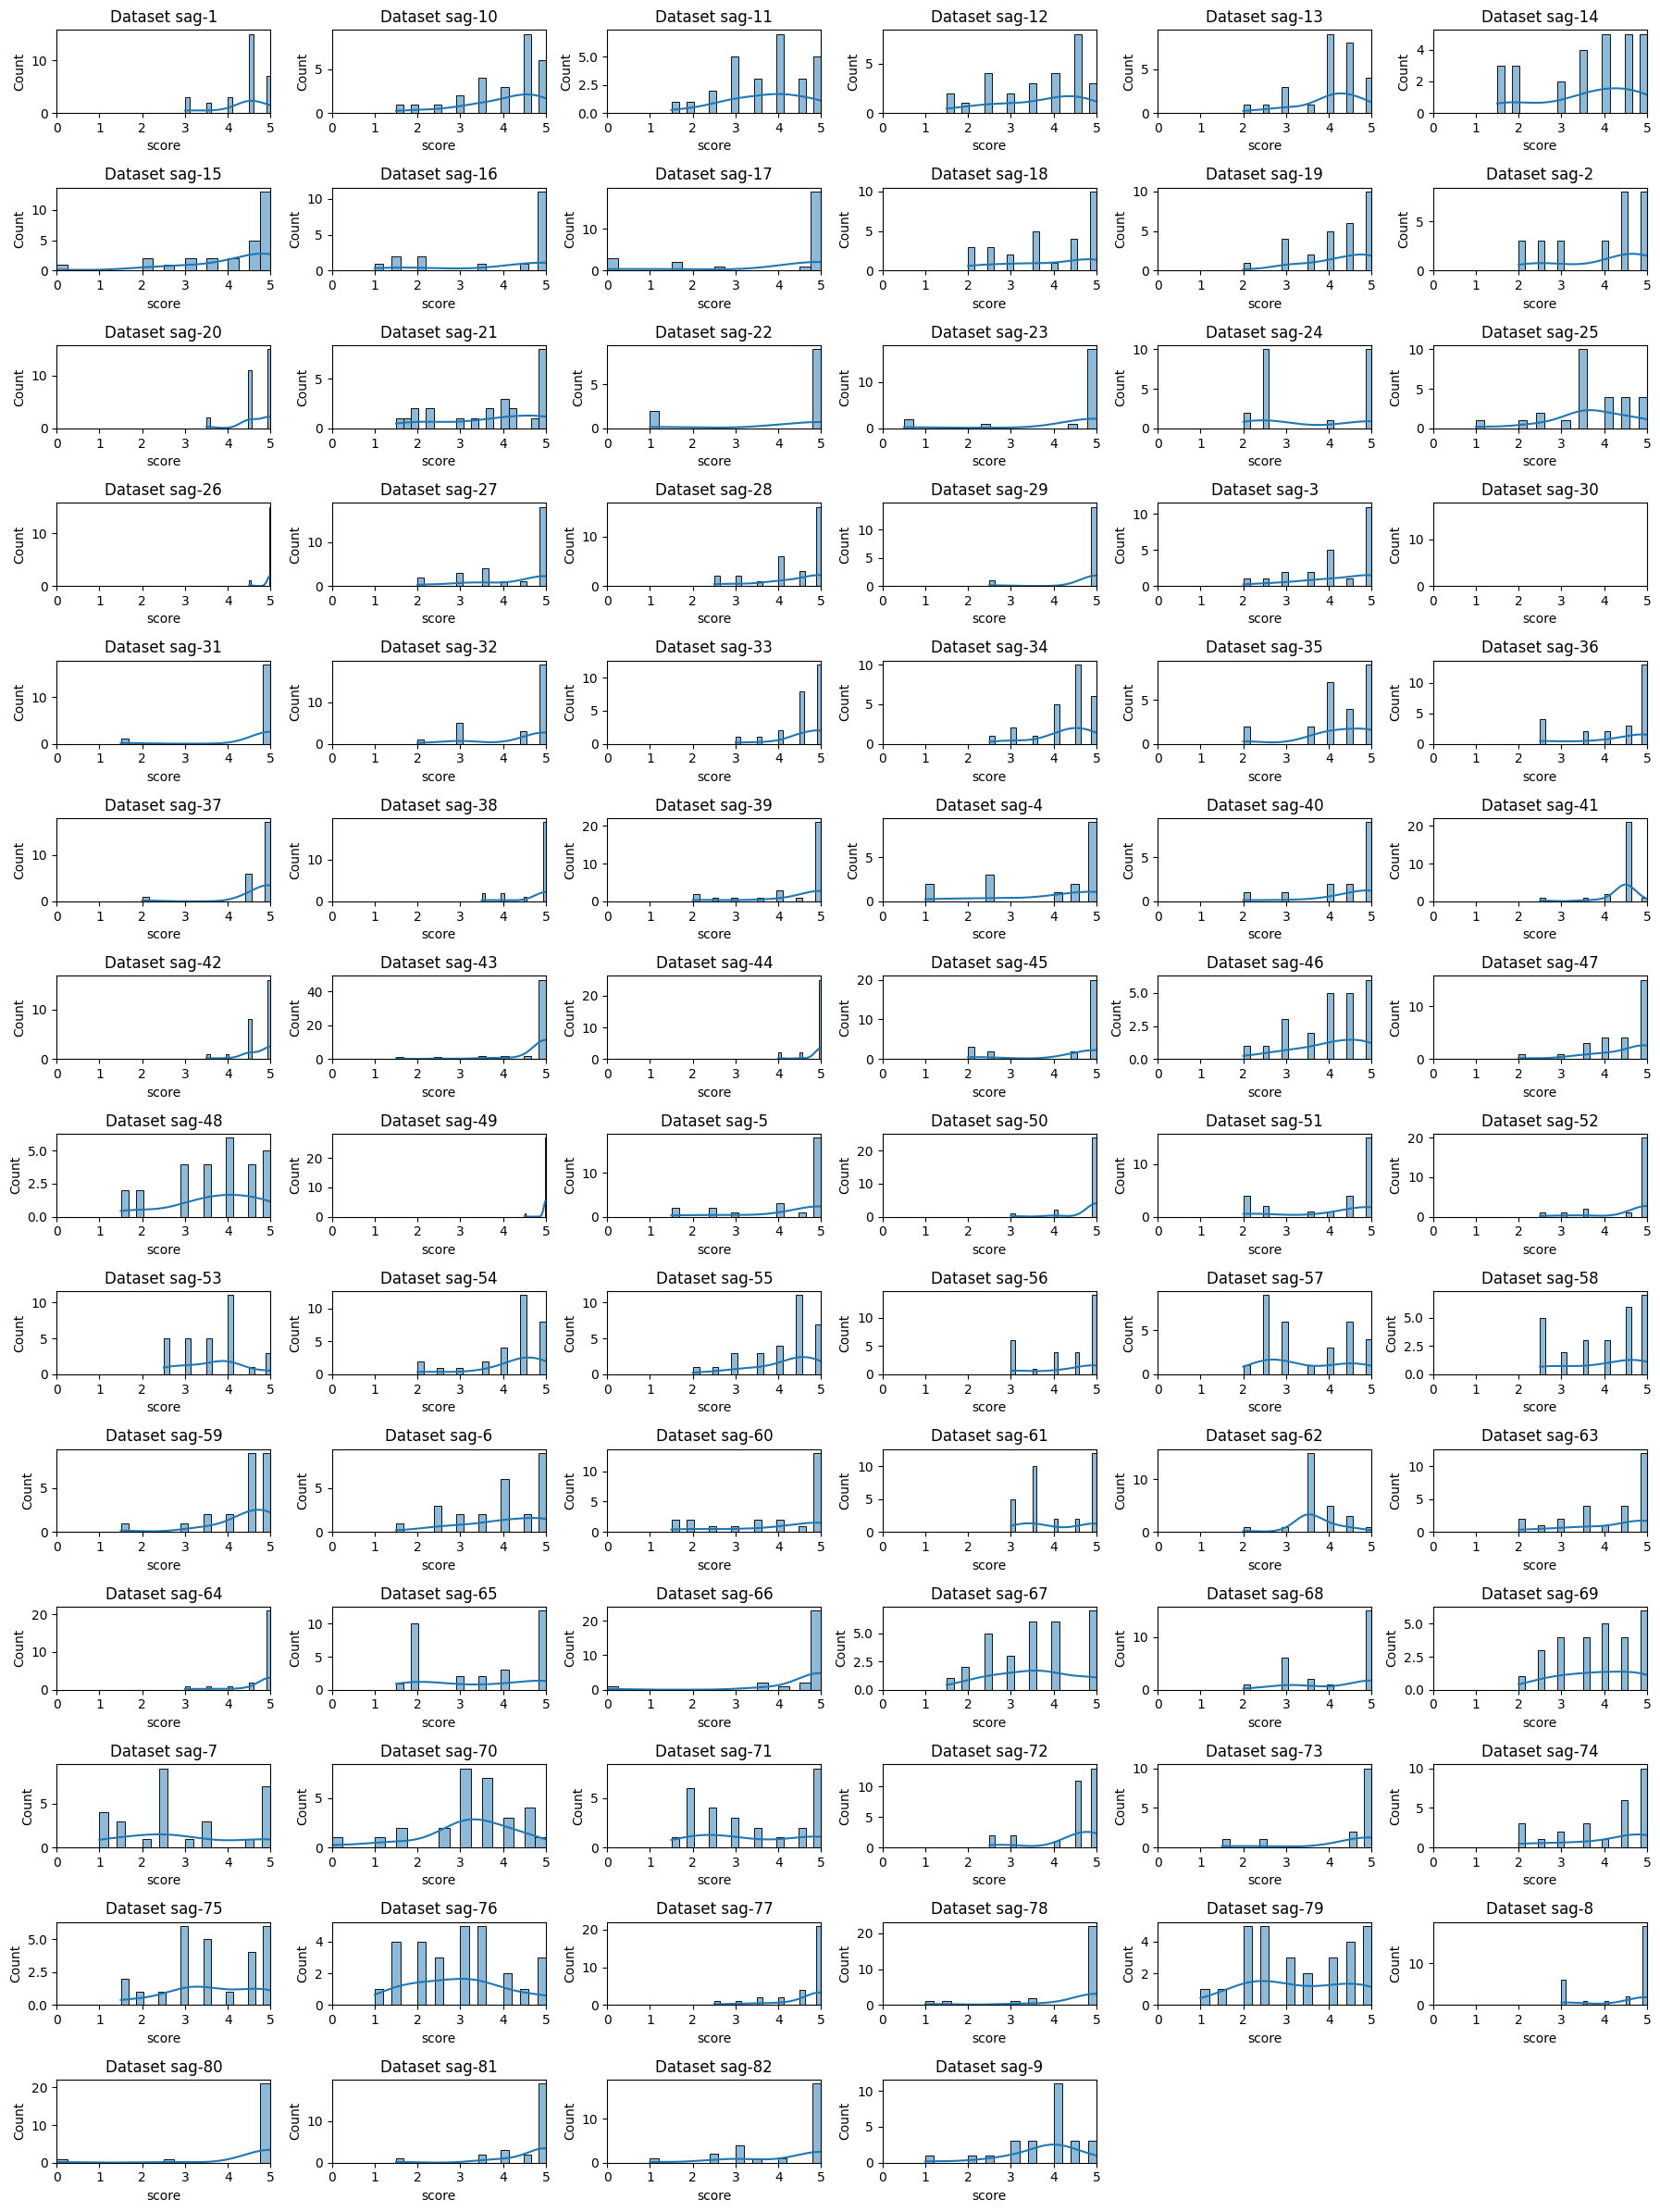

In [32]:
# Mengatur ukuran subplot grid
rows = 14  # 14 x 6 = 84 slots (cukup untuk 82 dataset_num)
cols = 6

# Membuat figure
fig, axes = plt.subplots(rows, cols, figsize=(18, 24))
axes = axes.flatten()

# Looping untuk setiap dataset_num
for i, dataset_num in enumerate(sorted(df_mohler['dataset_num'].unique())):
    ax = axes[i]
    subset = df_mohler[df_mohler['dataset_num'] == dataset_num]
    sns.histplot(subset['score'], bins=20, kde=True, ax=ax)
    ax.set_title(f"Dataset {dataset_num}")
    ax.set_xlim(0, 5)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


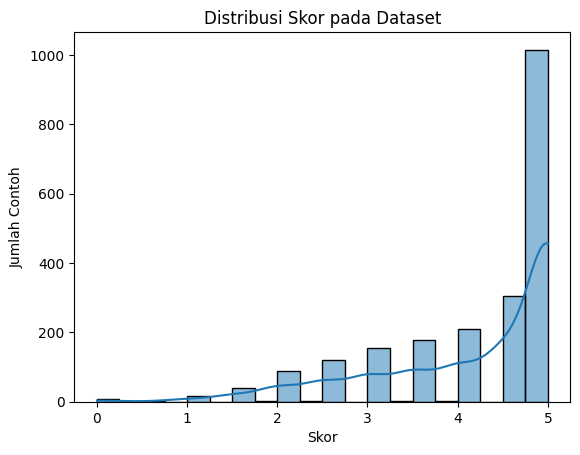

In [33]:
plt.figure()
sns.histplot(df_mohler['score'], bins=20, kde=True)
plt.title('Distribusi Skor pada Dataset')
plt.xlabel('Skor')
plt.ylabel('Jumlah Contoh')
plt.show()

# Split Specific-Prompt Dataset

In [34]:
from sklearn.model_selection import train_test_split
import pandas as pd

def split_dataset(df, train_ratio, valid_ratio, test_ratio):
    subset_dataset = df['dataset_num'].unique()
    splits = {}
    for subset in subset_dataset:
        # get data by dataset_num
        subset_df = df[df['dataset_num'] == subset]

        if len(subset_df) < 3:
            print(f"Skipping {subset} due to insufficient samples.")
            continue

        # split dataset
        train_df, temp_df = train_test_split(subset_df, test_size=(1 - train_ratio), random_state=42, shuffle=True)
        valid_df, test_df = train_test_split(temp_df, test_size=test_ratio / (valid_ratio + test_ratio), random_state=42, shuffle=True)

        # save split dataset
        splits[subset] = {
            'train': train_df,
            'valid': valid_df,
            'test': test_df,
        }
    
    train_dataset = pd.concat([splits[subset]['train'] for subset in subset_dataset])
    valid_dataset = pd.concat([splits[subset]['valid'] for subset in subset_dataset])
    test_dataset = pd.concat([splits[subset]['test'] for subset in subset_dataset])

    return train_dataset, valid_dataset, test_dataset

df_mohler = pd.read_csv("mohler_clean.csv")
print(df_mohler.info())
train, valid, test = split_dataset(df_mohler, 0.8, 0.1, 0.1)
train.to_csv("clean/spesific/train_mohler.csv", index=False)
valid.to_csv("clean/spesific/valid_mohler.csv", index=False)
test.to_csv("clean/spesific/test_mohler.csv", index=False)
print(train.info())
print(valid.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2138 non-null   object 
 1   reference_answer  2138 non-null   object 
 2   answer            2138 non-null   object 
 3   score             2138 non-null   float64
 4   dataset           2138 non-null   object 
 5   dataset_num       2138 non-null   object 
dtypes: float64(1), object(5)
memory usage: 100.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 16 to 2114
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          1678 non-null   object 
 1   reference_answer  1678 non-null   object 
 2   answer            1678 non-null   object 
 3   score             1678 non-null   float64
 4   dataset           1678 non-null   object 
 5   dataset_num       1678 

In [35]:
print(len(train['dataset_num'].unique()))
print(len(valid['dataset_num'].unique()))
print(len(test['dataset_num'].unique()))

82
82
82


In [36]:
train['kategori'] = 'specific-prompt'
train['split'] = 'Training'
valid['kategori'] = 'specific-prompt'
valid['split'] = 'Validation'
test['kategori'] = 'specific-prompt'
test['split'] = 'Testing'

df_concat = pd.concat([train, valid, test], axis=0, ignore_index=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2138 non-null   object 
 1   reference_answer  2138 non-null   object 
 2   answer            2138 non-null   object 
 3   score             2138 non-null   float64
 4   dataset           2138 non-null   object 
 5   dataset_num       2138 non-null   object 
 6   kategori          2138 non-null   object 
 7   split             2138 non-null   object 
dtypes: float64(1), object(7)
memory usage: 133.8+ KB


# Split Dataset Cross-Prompt

In [37]:
df_mohler = pd.read_csv("mohler_clean.csv")
print(df_mohler.info())
df_mohler['soal_num'] = df_mohler['dataset_num'].str.extract(r'-(\d+)$').astype(int)

train_parts = []
val_parts = []
test_parts = []

# Urutkan supaya pembagian konsisten
df_mohler = df_mohler.sort_values('soal_num')

# Ambil unique soal_num dalam kategori ini
soal_ids = df_mohler['soal_num'].unique()

# Ambil 8 soal untuk training, 1 validasi, 1 test
train_ids, temp_ids = train_test_split(soal_ids, test_size=0.2, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

# Ambil data berdasarkan soal_num
train_parts.append(df_mohler[df_mohler['soal_num'].isin(train_ids)])
val_parts.append(df_mohler[df_mohler['soal_num'].isin(val_ids)])
test_parts.append(df_mohler[df_mohler['soal_num'].isin(test_ids)])

train_df = pd.concat(train_parts).reset_index(drop=True)
valid_df = pd.concat(val_parts).reset_index(drop=True)
test_df = pd.concat(test_parts).reset_index(drop=True)

train_df.to_csv("clean/cross/train_mohler.csv", index=False)
valid_df.to_csv("clean/cross/valid_mohler.csv", index=False)
test_df.to_csv("clean/cross/test_mohler.csv", index=False)
print(len(train_df['dataset_num']))
print(len(valid_df['dataset_num']))
print(len(test_df['dataset_num']))
print(len(train_df['dataset_num'].unique()))
print(len(valid_df['dataset_num'].unique()))
print(len(test_df['dataset_num'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2138 non-null   object 
 1   reference_answer  2138 non-null   object 
 2   answer            2138 non-null   object 
 3   score             2138 non-null   float64
 4   dataset           2138 non-null   object 
 5   dataset_num       2138 non-null   object 
dtypes: float64(1), object(5)
memory usage: 100.3+ KB
None
1704
222
212
65
8
9


In [38]:
train_df['kategori'] = 'cross-prompt'
train_df['split'] = 'Training'
valid_df['kategori'] = 'cross-prompt'
valid_df['split'] = 'Validation'
test_df['kategori'] = 'cross-prompt'
test_df['split'] = 'Testing'

df_cross = pd.concat([train_df, valid_df, test_df], axis=0, ignore_index=True)
df_cross.info()

df_full = pd.concat([df_concat, df_cross], axis=0, ignore_index=True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2138 non-null   object 
 1   reference_answer  2138 non-null   object 
 2   answer            2138 non-null   object 
 3   score             2138 non-null   float64
 4   dataset           2138 non-null   object 
 5   dataset_num       2138 non-null   object 
 6   soal_num          2138 non-null   int32  
 7   kategori          2138 non-null   object 
 8   split             2138 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 142.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          4276 non-null   object 
 1   reference_answer  4276 non-null   object 
 2   answer        

## Score distribution

In [50]:
import pandas as pd

df_train = pd.read_csv("clean/spesific/train_mohler.csv")
df_valid = pd.read_csv("clean/spesific/valid_mohler.csv")
df_test = pd.read_csv("clean/spesific/test_mohler.csv")
df_train['kategori'] = 'specific-prompt'
df_train['split'] = 'Training'
df_valid['kategori'] = 'specific-prompt'
df_valid['split'] = 'Validation'
df_test['kategori'] = 'specific-prompt'
df_test['split'] = 'Testing'

df_train1 = pd.read_csv("clean/cross/train_mohler.csv")
df_valid1 = pd.read_csv("clean/cross/valid_mohler.csv")
df_test1 = pd.read_csv("clean/cross/test_mohler.csv")
df_train1['kategori'] = 'cross-prompt'
df_train1['split'] = 'Training'
df_valid1['kategori'] = 'cross-prompt'
df_valid1['split'] = 'Validation'
df_test1['kategori'] = 'cross-prompt'
df_test1['split'] = 'Testing'

df_full = pd.concat([df_train, df_valid, df_test, df_train1, df_valid1, df_test1], axis=0, ignore_index=True)

print(len(df_train['question']))
print(len(df_valid['question']))
print(len(df_test['question']))
print(len(df_train1['question']))
print(len(df_valid1['question']))
print(len(df_test1['question']))
df_full.info()

1678
218
242
1704
222
212
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          4276 non-null   object 
 1   reference_answer  4276 non-null   object 
 2   answer            4276 non-null   object 
 3   score             4276 non-null   float64
 4   dataset           4276 non-null   object 
 5   dataset_num       4276 non-null   object 
 6   kategori          4276 non-null   object 
 7   split             4276 non-null   object 
 8   soal_num          2138 non-null   float64
dtypes: float64(2), object(7)
memory usage: 300.8+ KB


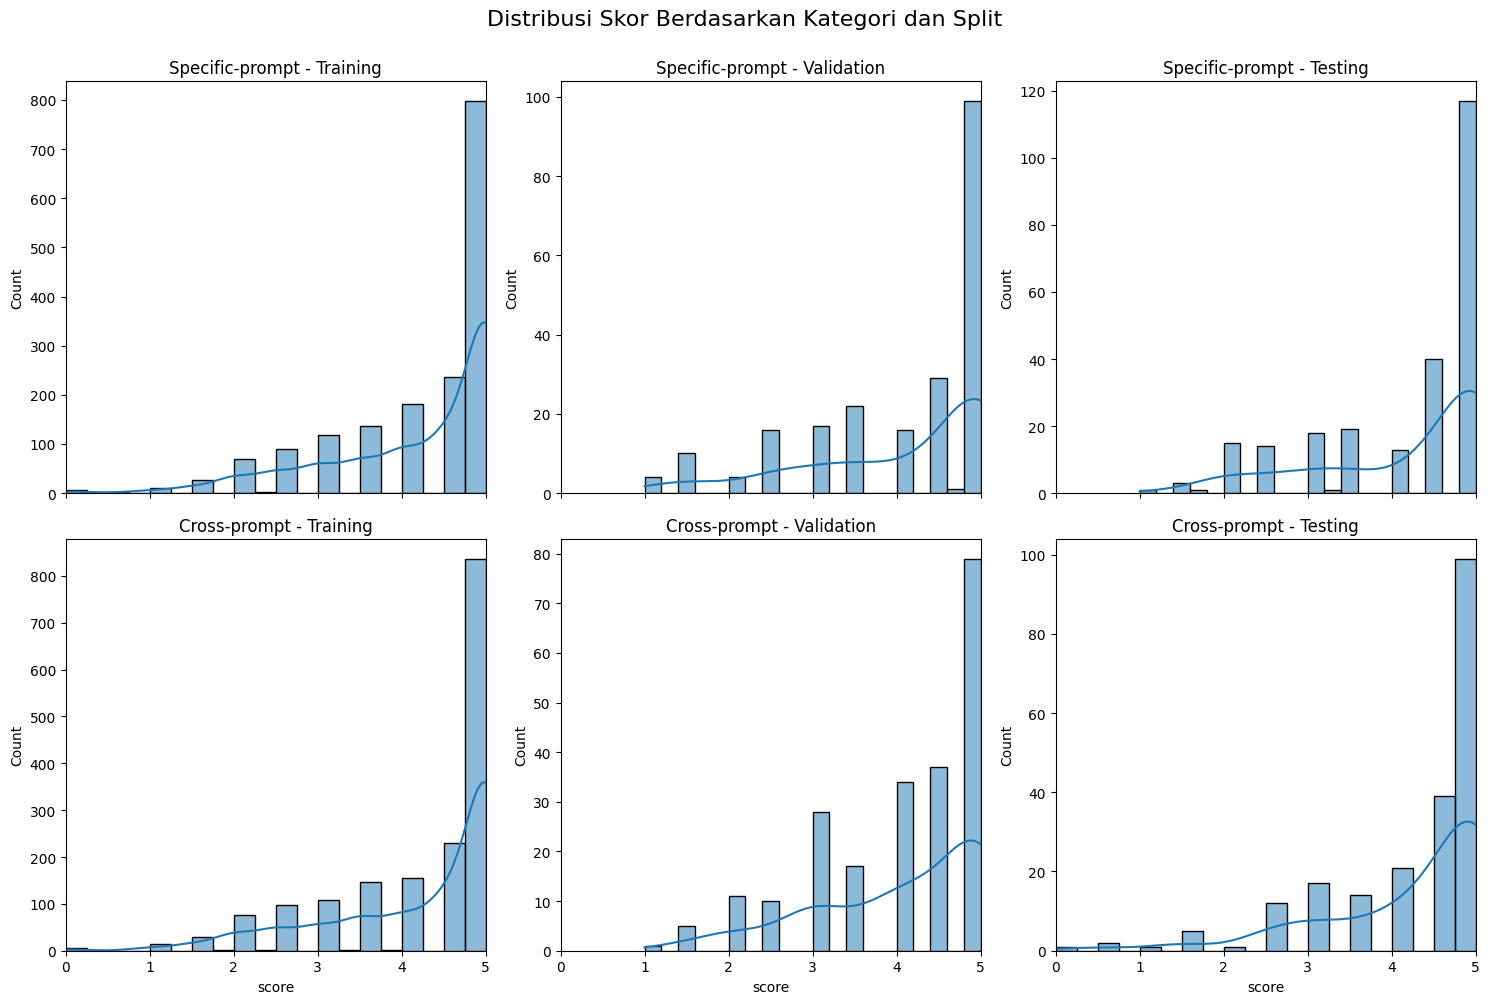

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=False)
splits = ['Training', 'Validation', 'Testing']
categories = ['specific-prompt', 'cross-prompt']

for i, cat in enumerate(categories):
    for j, split in enumerate(splits):
        ax = axes[i, j]
        subset = df_full[(df_full['kategori'] == cat) & (df_full['split'] == split)]
        sns.histplot(subset['score'], bins=20, kde=True, ax=ax)
        ax.set_title(f"{cat.capitalize()} - {split}")
        ax.set_xlim(0, 5)

fig.suptitle("Distribusi Skor Berdasarkan Kategori dan Split", fontsize=16, y=1)
plt.tight_layout()
plt.show()

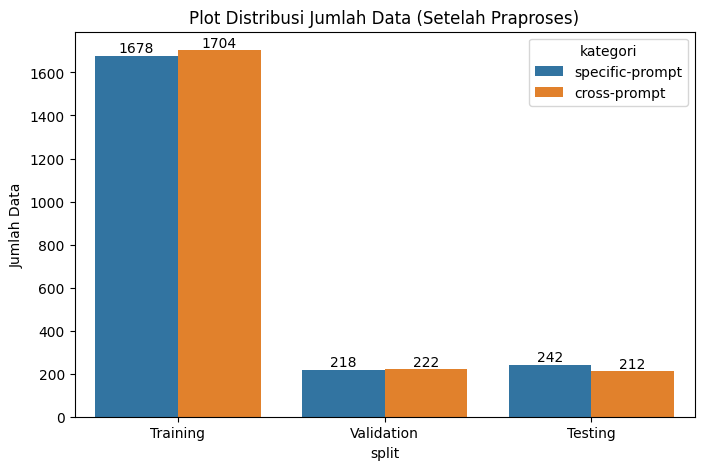

In [52]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the count plot with hue based on 'kategori' to differentiate categories
ax = sns.countplot(data=df_full, x='split', hue='kategori')

# Add labels on top of each bar (for each category in the 'split')
for container in ax.containers:
    ax.bar_label(container)

# Set the title and axis labels
plt.title('Plot Distribusi Jumlah Data (Setelah Praproses)')
plt.ylabel('Jumlah Data')

# Display the plot
plt.show()
